In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Sentiment_Stock_data.csv')
df.sample(5)

,Unnamed: 0,Sentiment,Sentence
85958,88491,0,Massed Israeli troops poised for invasion of Gaza
69470,71995,0,"b""Kyrgyz Protests against high gas prices and ..."
72193,74720,1,"Weary of drug war, Mexico debates legalization..."
9135,9671,0,Pakistan set off on perilous pursuit of Boycott
63374,65894,1,b'Russia Ends Operation in Chechnya '


# EDA

In [3]:
df.head()

,Unnamed: 0,Sentiment,Sentence
0,0,0,"According to Gran , the company has no plans t..."
1,1,1,"For the last quarter of 2010 , Componenta 's n..."
2,2,1,"In the third quarter of 2010 , net sales incre..."
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro..."


In [4]:
df.columns

Index(['Unnamed: 0', 'Sentiment', 'Sentence'], dtype='object')

In [5]:
df.shape

(108751, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108751 entries, 0 to 108750
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108751 non-null  int64 
 1   Sentiment   108751 non-null  int64 
 2   Sentence    108750 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


In [7]:
df.describe()

,Unnamed: 0,Sentiment
count,108751.000000,108751.000000
mean,56170.753805,0.512409
std,32176.702428,0.499848
min,0.000000,0.000000
25%,28199.500000,0.000000
50%,56583.000000,1.000000
75%,84094.500000,1.000000
max,111294.000000,1.000000


In [8]:
#cheacking Null value

In [8]:
np.sum(df.isnull().any(axis=1))

1

In [9]:
#droping null values
df.dropna(inplace= True)
df.shape

(108750, 3)

In [10]:
print("No. of colums", len(df.columns))
print("No. of rows", len(df))

No. of colums 3
No. of rows 108750


In [11]:
df["Sentiment"].unique()

array([0, 1], dtype=int64)

In [12]:
df["Sentiment"].value_counts()

1    55724
0    53026
Name: Sentiment, dtype: int64

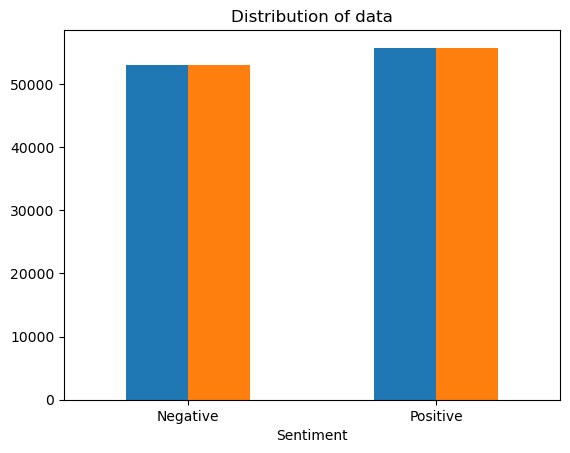

In [13]:
# Plotting the distribution for dataset.
ax = df.groupby('Sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['Sentence']), list(df['Sentiment'])

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

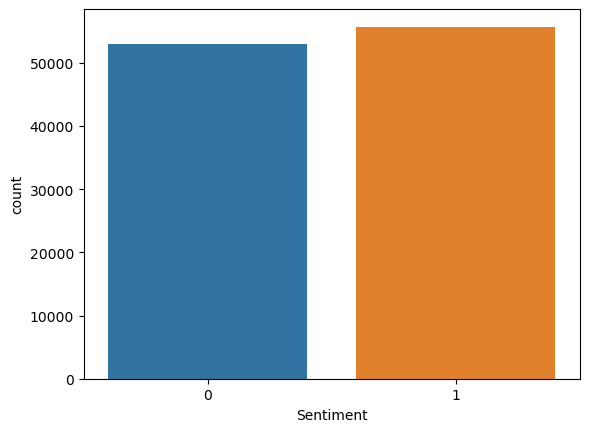

In [14]:
import seaborn as sns
sns.countplot(x='Sentiment', data=df)

# Data Preprocessing

In [164]:
data=df[['Sentence','Sentiment']]



In [165]:
data.head()

,Sentence,Sentiment
0,"According to Gran , the company has no plans t...",0
1,"For the last quarter of 2010 , Componenta 's n...",1
2,"In the third quarter of 2010 , net sales incre...",1
3,Operating profit rose to EUR 13.1 mn from EUR ...,1
4,"Operating profit totalled EUR 21.1 mn , up fro...",1


In [120]:
data_pos= data[data["Sentiment"]==1]
data_neg= data[data["Sentiment"]==0]


In [166]:
dataset = pd.concat([data_pos, data_neg])

In [167]:
dataset.tail()

,Sentence,Sentiment
108646,Brexit opinion poll reveals majority don't wan...,0
108647,"Conservative MP Leave Campaigner: ""The leave c...",0
108648,"Economists predict UK recession, further weake...",0
108649,"New EU 'superstate plan by France, Germany: Cr...",0
108650,Pakistani clerics declare transgender marriage...,0


In [168]:
#remeoving stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

# text = "Nick likes to play football, however he is not too fond of tennis."
# text_tokens = word_tokenize(text)

# tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

# print(tokens_without_sw)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [169]:
stopword1=set(stopwords.words("english"))
stopword1

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [170]:
dataset['Sentence']=dataset['Sentence'].str.lower()
dataset['Sentence'].tail()

108646    brexit opinion poll reveals majority don't wan...
108647    conservative mp leave campaigner: "the leave c...
108648    economists predict uk recession, further weake...
108649    new eu 'superstate plan by france, germany: cr...
108650    pakistani clerics declare transgender marriage...
Name: Sentence, dtype: object

In [171]:
# STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopword1])
dataset['Sentence'] = dataset['Sentence'].apply(lambda text: cleaning_stopwords(text))
dataset['Sentence'].head()

1    last quarter 2010 , componenta 's net sales do...
2    third quarter 2010 , net sales increased 5.2 %...
3    operating profit rose eur 13.1 mn eur 8.7 mn c...
4    operating profit totalled eur 21.1 mn , eur 18...
5    finnish talentum reports operating profit incr...
Name: Sentence, dtype: object

In [172]:
dataset.shape

(108750, 2)

In [173]:
import string 
english_punctuations = string.punctuation 
punctuations_list = english_punctuations
def cleaning_punctuations(text): 
    translator = str.maketrans('', '', punctuations_list) 
    return text.translate(translator) 
dataset['Sentence']= dataset['Sentence'].apply(lambda x: cleaning_punctuations(x))
dataset['Sentence'].tail()

108646    brexit opinion poll reveals majority want seco...
108647    conservative mp leave campaigner the leave cam...
108648    economists predict uk recession weakening poun...
108649    new eu superstate plan france germany creating...
108650    pakistani clerics declare transgender marriage...
Name: Sentence, dtype: object

In [174]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['Sentence'] = dataset['Sentence'].apply(lambda x: cleaning_repeating_char(x))
dataset['Sentence'].tail()

108646    brexit opinion poll reveals majority want seco...
108647    conservative mp leave campaigner the leave cam...
108648    economists predict uk recession weakening poun...
108649    new eu superstate plan france germany creating...
108650    pakistani clerics declare transgender marriage...
Name: Sentence, dtype: object

In [175]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['Sentence'] = dataset['Sentence'].apply(lambda x: cleaning_URLs(x))
dataset['Sentence'].tail()

108646    brexit opinion poll reveals majority want seco...
108647    conservative mp leave campaigner the leave cam...
108648    economists predict uk recession weakening poun...
108649    new eu superstate plan france germany creating...
108650    pakistani clerics declare transgender marriage...
Name: Sentence, dtype: object

In [176]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['Sentence'] = dataset['Sentence'].apply(lambda x: cleaning_numbers(x))
dataset['Sentence'].tail()

108646    brexit opinion poll reveals majority want seco...
108647    conservative mp leave campaigner the leave cam...
108648    economists predict uk recession weakening poun...
108649    new eu superstate plan france germany creating...
108650    pakistani clerics declare transgender marriage...
Name: Sentence, dtype: object

In [177]:
dataset.columns

Index(['Sentence', 'Sentiment'], dtype='object')

In [178]:
dataset.tail()

,Sentence,Sentiment
108646,brexit opinion poll reveals majority want seco...,0
108647,conservative mp leave campaigner the leave cam...,0
108648,economists predict uk recession weakening poun...,0
108649,new eu superstate plan france germany creating...,0
108650,pakistani clerics declare transgender marriage...,0


In [179]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
dataset['Sentence'] = dataset['Sentence'].apply(tokenizer.tokenize)
dataset['Sentence'].head()

1    [last, quarter, componenta, s, net, sales, dou...
2    [third, quarter, net, sales, increased, eur, m...
3    [operating, profit, rose, eur, mn, eur, mn, co...
4    [operating, profit, totalled, eur, mn, eur, mn...
5    [finnish, talentum, reports, operating, profit...
Name: Sentence, dtype: object

In [180]:
dataset.tail()

,Sentence,Sentiment
108646,"[brexit, opinion, poll, reveals, majority, wan...",0
108647,"[conservative, mp, leave, campaigner, the, lea...",0
108648,"[economists, predict, uk, recession, weakening...",0
108649,"[new, eu, superstate, plan, france, germany, c...",0
108650,"[pakistani, clerics, declare, transgender, mar...",0


In [181]:
# import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text


dataset['Sentence']= dataset['Sentence'].apply(lambda x: stemming_on_text(x))
dataset['Sentence'].head()

1    [last, quarter, componenta, s, net, sale, doub...
2    [third, quarter, net, sale, increas, eur, mn, ...
3    [oper, profit, rose, eur, mn, eur, mn, corresp...
4    [oper, profit, total, eur, mn, eur, mn, repres...
5    [finnish, talentum, report, oper, profit, incr...
Name: Sentence, dtype: object

In [182]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text
dataset['Sentence'] = dataset['Sentence'].apply(lambda x: lemmatizer_on_text(x))
dataset['Sentence'].head()

1    [last, quarter, componenta, s, net, sale, doub...
2    [third, quarter, net, sale, increas, eur, mn, ...
3    [oper, profit, rose, eur, mn, eur, mn, corresp...
4    [oper, profit, total, eur, mn, eur, mn, repres...
5    [finnish, talentum, report, oper, profit, incr...
Name: Sentence, dtype: object

In [183]:
dataset.rename(columns = {'Sentence':'text', 'Sentiment':'target'}, inplace = True)

In [184]:
dataset.head()

,text,target
1,"[last, quarter, componenta, s, net, sale, doub...",1
2,"[third, quarter, net, sale, increas, eur, mn, ...",1
3,"[oper, profit, rose, eur, mn, eur, mn, corresp...",1
4,"[oper, profit, total, eur, mn, eur, mn, repres...",1
5,"[finnish, talentum, report, oper, profit, incr...",1


In [198]:
def listtostring(x):
    str1= " ".join([str(ele) for ele in x])
    return str1
    
   
 


In [199]:
X=dataset["text"].apply(lambda x: listtostring(x))
y=dataset.target

In [222]:
data_neg= dataset[dataset["target"]==0]

data_neg


,text,target
0,"[accord, gran, compani, plan, move, product, r...",0
36,"[request, finnish, medium, compani, alma, medi...",0
37,"[stock, exchang, announc, juli, baswar, share,...",0
38,"[maximum, new, share, subscrib, exercis, b, op...",0
39,"[tiimari, oper, store, six, countri, includ, c...",0
...,...,...
108646,"[brexit, opinion, poll, reveal, major, want, s...",0
108647,"[conserv, mp, leav, campaign, the, leav, campa...",0
108648,"[economist, predict, uk, recess, weaken, pound...",0
108649,"[new, eu, superst, plan, franc, germani, creat...",0


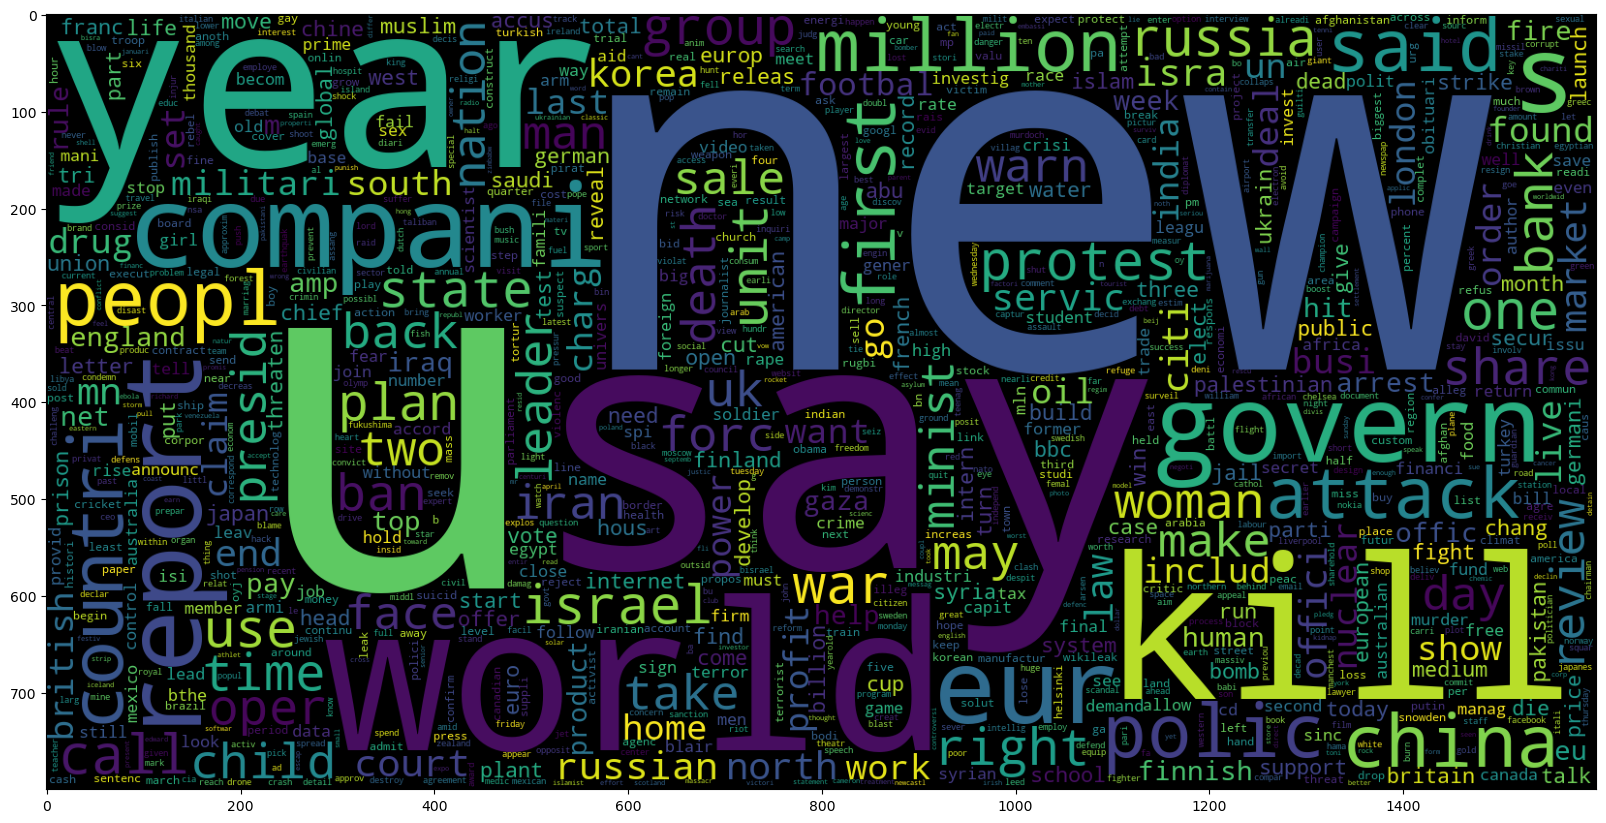

In [225]:
# data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg["text"].apply(listtostring)))
plt.imshow(wc)

In [226]:
data_pos= dataset[dataset["target"]==1]

data_pos

,text,target
1,"[last, quarter, componenta, s, net, sale, doub...",1
2,"[third, quarter, net, sale, increas, eur, mn, ...",1
3,"[oper, profit, rose, eur, mn, eur, mn, corresp...",1
4,"[oper, profit, total, eur, mn, eur, mn, repres...",1
5,"[finnish, talentum, report, oper, profit, incr...",1
...,...,...
108746,"[philippin, presid, rodrigo, dutert, urg, peop...",1
108747,"[spain, arrest, three, pakistani, accus, promo...",1
108748,"[venezuela, anger, food, shortag, still, mount...",1
108749,"[hindu, templ, worker, kill, three, men, motor...",1


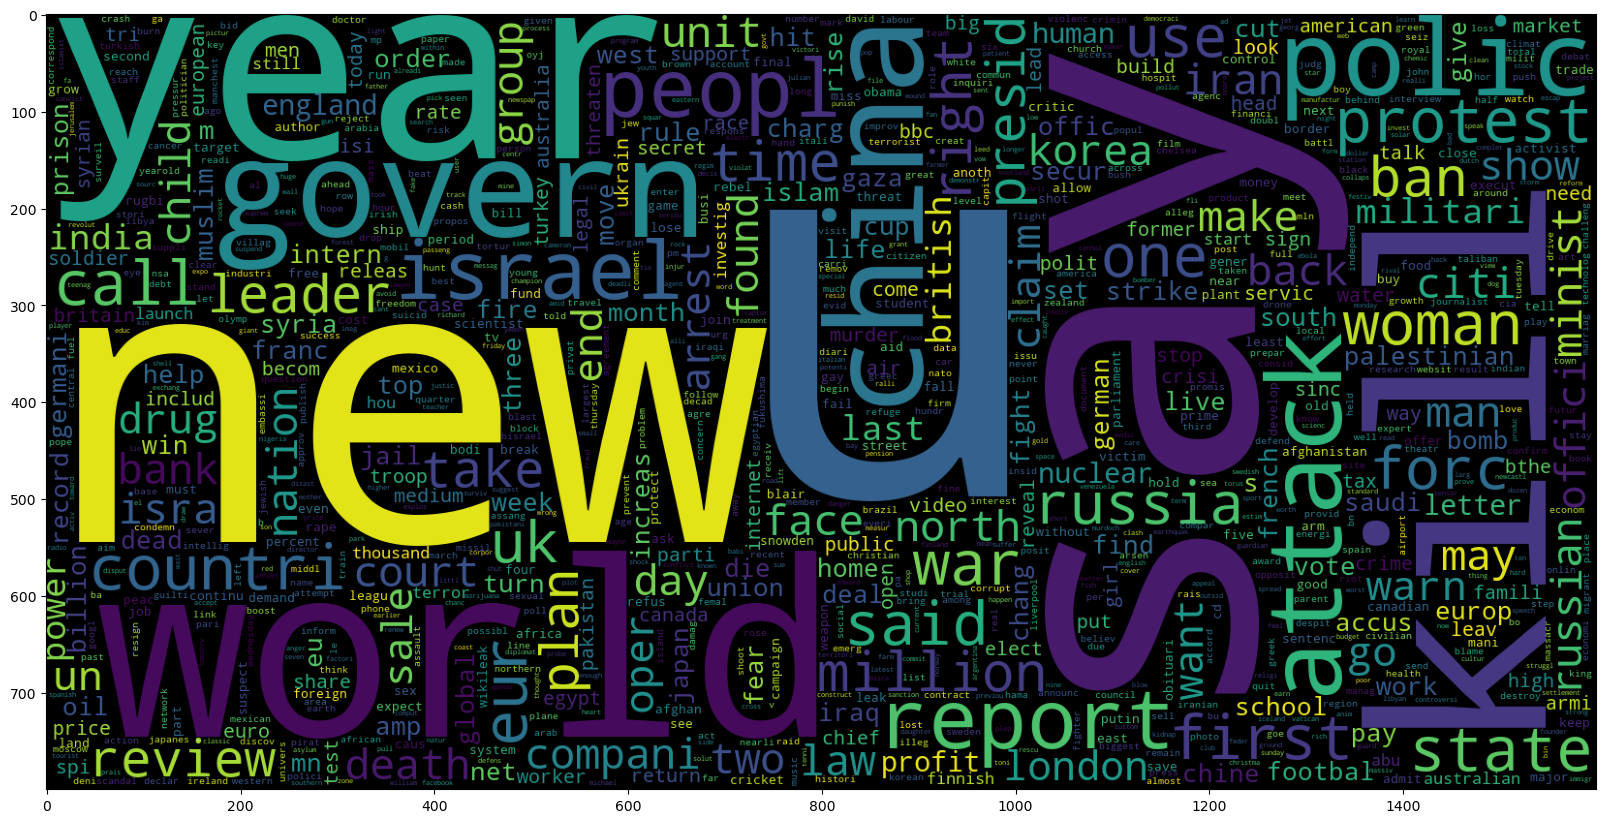

In [227]:
# data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos["text"].apply(listtostring)))
plt.imshow(wc)

In [200]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state =26105111)

In [201]:
X_train

26103                   my famili africa send money get by
32562                               bbc sunk boat race row
38464                          gangmast sentenc seven year
25305                       ryder avoid jail theft convict
43492                         agreement reach u tortur ban
                               ...                        
46452                                           break wall
83673                       london even beij put armi gate
91720    deafyearold girl traffick uk kept cellar rape ...
1896     kesko previous publish stock exchang releas co...
39586                          tom dyckhoff let move dubai
Name: text, Length: 97875, dtype: object

In [202]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


In [204]:
vectoriser.get_feature_names()

['aa',
 'aa aa',
 'aa aaa',
 'aa contract',
 'aa fb',
 'aa miln',
 'aa staff',
 'aa tri',
 'aaa',
 'aaa aab',
 'aaa credit',
 'aaa rate',
 'aaa seal',
 'aaaw',
 'aaaw nice',
 'aab',
 'aab world',
 'aabo',
 'aabo abl',
 'aadmi',
 'aadmi parti',
 'aafia',
 'aafia disappear',
 'aafia siddiqui',
 'aah',
 'aah bbc',
 'aah camara',
 'aaland',
 'aaland island',
 'aalborg',
 'aalborg northern',
 'aali',
 'aali grave',
 'aalto',
 'aalto univers',
 'aaltonen',
 'aaltonen finland',
 'aam',
 'aam aadmi',
 'aamer',
 'aamer last',
 'aamir',
 'aamir khan',
 'aamir murder',
 'aap',
 'aap circumcis',
 'aap parti',
 'aapl',
 'aapl aapl',
 'aapl action',
 'aapl aet',
 'aapl afternoon',
 'aapl appl',
 'aapl apr',
 'aapl axp',
 'aapl beat',
 'aapl beaten',
 'aapl big',
 'aapl bounc',
 'aapl broke',
 'aapl broken',
 'aapl call',
 'aapl cb',
 'aapl celg',
 'aapl dip',
 'aapl dma',
 'aapl doubl',
 'aapl downgrad',
 'aapl final',
 'aapl first',
 'aapl fli',
 'aapl goldman',
 'aapl good',
 'aapl gundlach',
 'aa

In [205]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [207]:
X_train[1]

<1x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [210]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)





# Model 1 NB

              precision    recall  f1-score   support

           0       0.56      0.32      0.40      5324
           1       0.54      0.76      0.63      5551

    accuracy                           0.54     10875
   macro avg       0.55      0.54      0.52     10875
weighted avg       0.55      0.54      0.52     10875



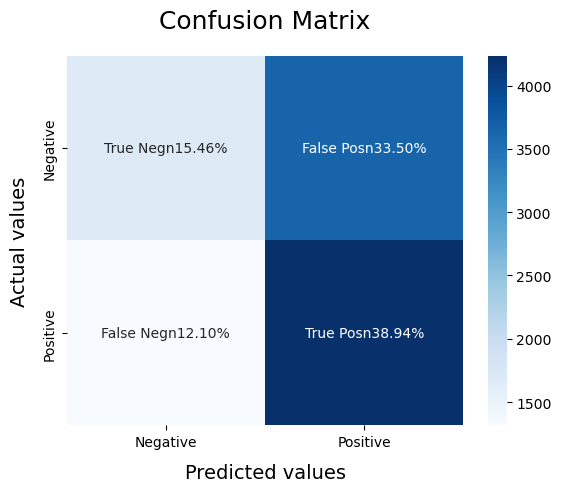

In [211]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

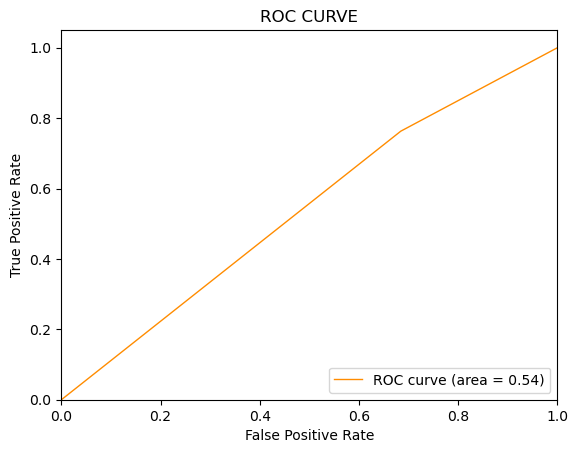

In [212]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Model SVM

              precision    recall  f1-score   support

           0       0.52      0.49      0.51      5324
           1       0.54      0.57      0.55      5551

    accuracy                           0.53     10875
   macro avg       0.53      0.53      0.53     10875
weighted avg       0.53      0.53      0.53     10875



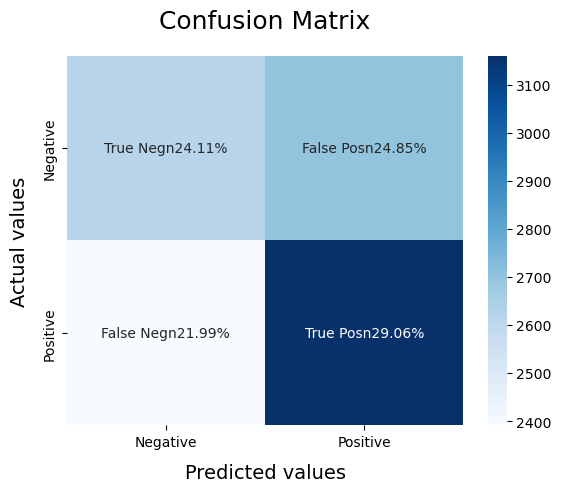

In [213]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

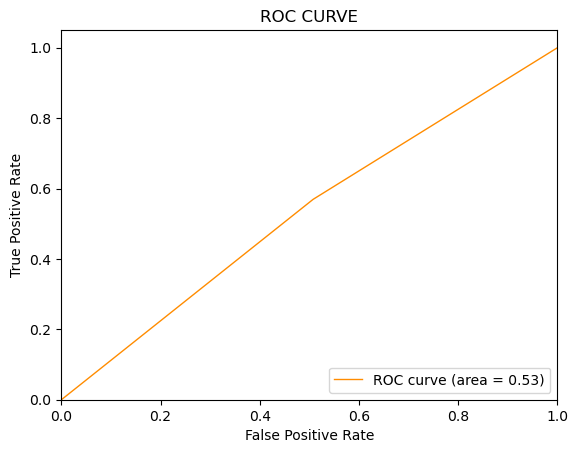

In [214]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Model 3 LGR

              precision    recall  f1-score   support

           0       0.52      0.46      0.49      5324
           1       0.54      0.60      0.57      5551

    accuracy                           0.53     10875
   macro avg       0.53      0.53      0.53     10875
weighted avg       0.53      0.53      0.53     10875



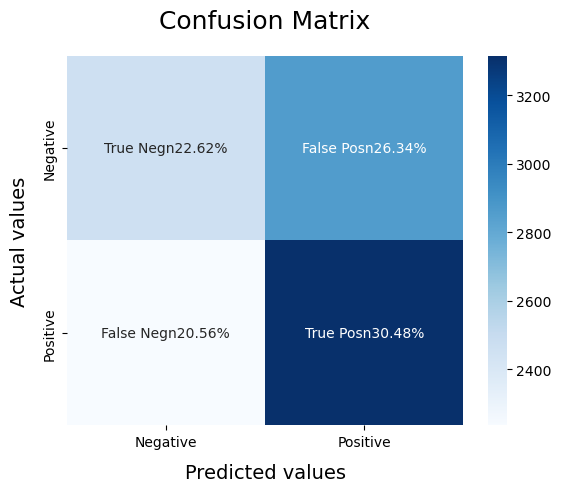

In [215]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

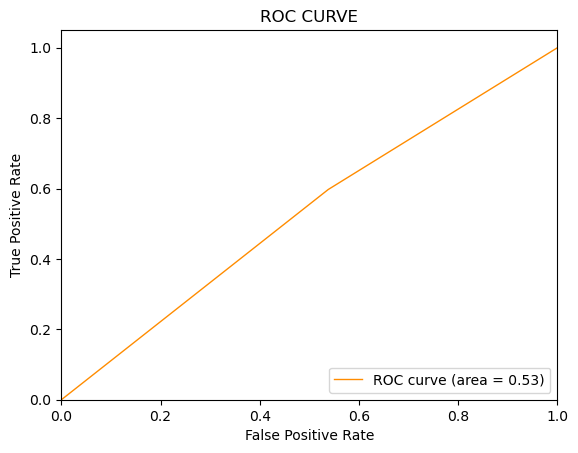

In [216]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()